# A neural network for a binary classification

## import library

In [501]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm
import os
from tqdm import tqdm

## load data

In [502]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/MachineLearning2022-2/MachineLearning2022-2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/MachineLearning2022-2/MachineLearning2022-2


In [503]:
directory_data  = './'
filename_data   = 'assignment_03_data.npz'
path_data       = os.path.join(directory_data, filename_data) 
data            = np.load(path_data)

x_train = data['x_train']
y_train = data['y_train']

x_test  = data['x_test']
y_test  = data['y_test']

In [504]:
print('*************************************************')
print('size of x_train :', x_train.shape)
print('size of y_train :', y_train.shape)
print('*************************************************')
print('size of x_test :', x_test.shape)
print('size of y_test :', y_test.shape)
print('*************************************************')
print('number of training image :', x_train.shape[0])
print('height of training image :', x_train.shape[1])
print('width of training image :', x_train.shape[2])
print('*************************************************')
print('number of testing image :', x_test.shape[0])
print('height of testing image :', x_test.shape[1])
print('width of testing image :', x_test.shape[2])
print('*************************************************')

*************************************************
size of x_train : (10000, 28, 28)
size of y_train : (10000,)
*************************************************
size of x_test : (1800, 28, 28)
size of y_test : (1800,)
*************************************************
number of training image : 10000
height of training image : 28
width of training image : 28
*************************************************
number of testing image : 1800
height of testing image : 28
width of testing image : 28
*************************************************


## convert data into numpy array

In [505]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_test  = np.asarray(x_test)
y_test  = np.asarray(y_test)

## plot grey image

In [506]:
def plot_image(title, data):

    nRow = 2
    nCol = 4
    size = 4
    
    fig, axes = plt.subplots(nRow, nCol, figsize=(size * nCol, size * nRow))
    fig.suptitle(title, fontsize=16)
    
    for i in range(nRow):
        for j in range(nCol):

            k = i * nCol + j
            axes[i, j].imshow(data[k], cmap='gray', vmin=0, vmax=1)

    plt.tight_layout()
    plt.show()

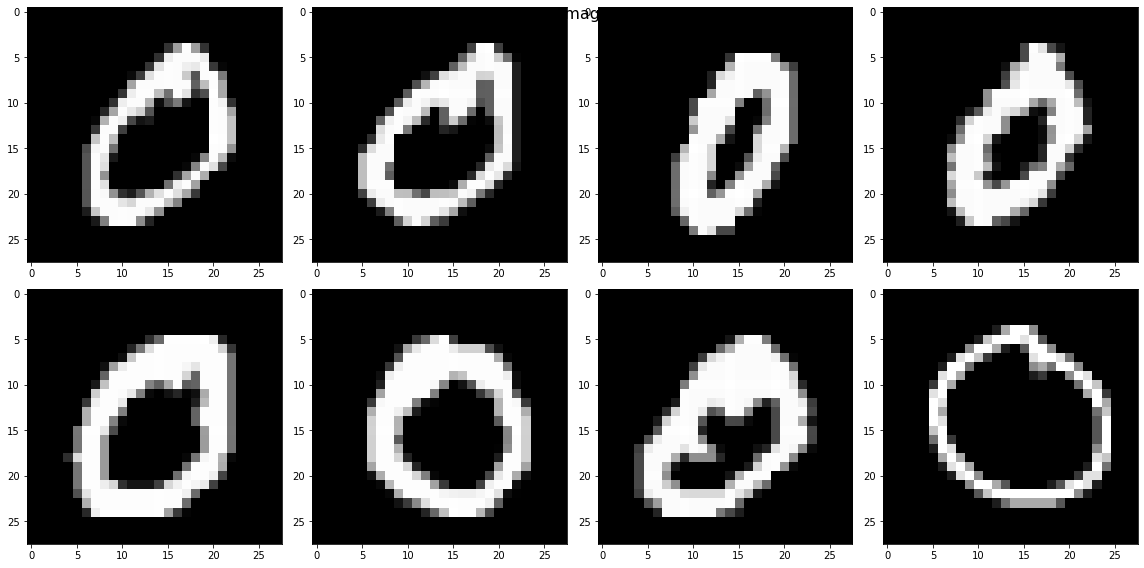

In [507]:
plot_image('training image for 0', x_train)

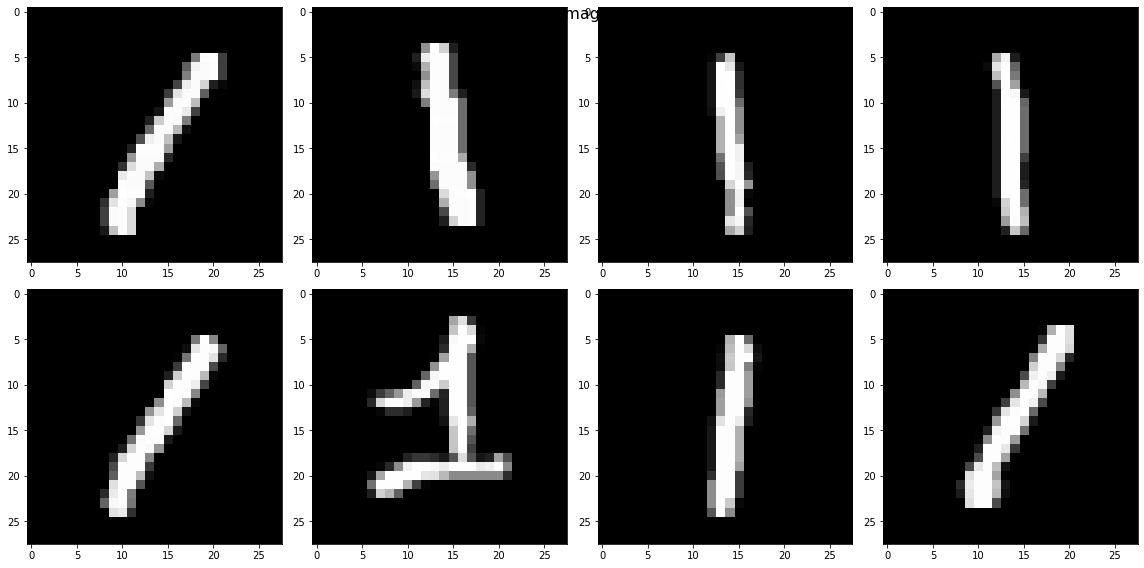

In [508]:
plot_image('training image for 1', x_train[5000:,:,:])

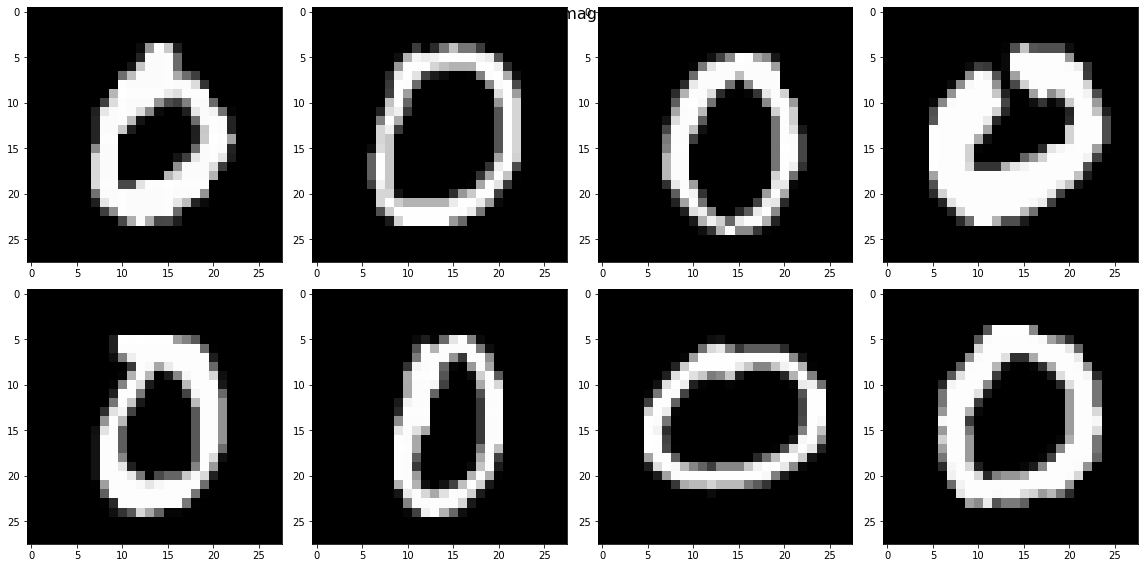

In [509]:
plot_image('testing image for 0', x_test)

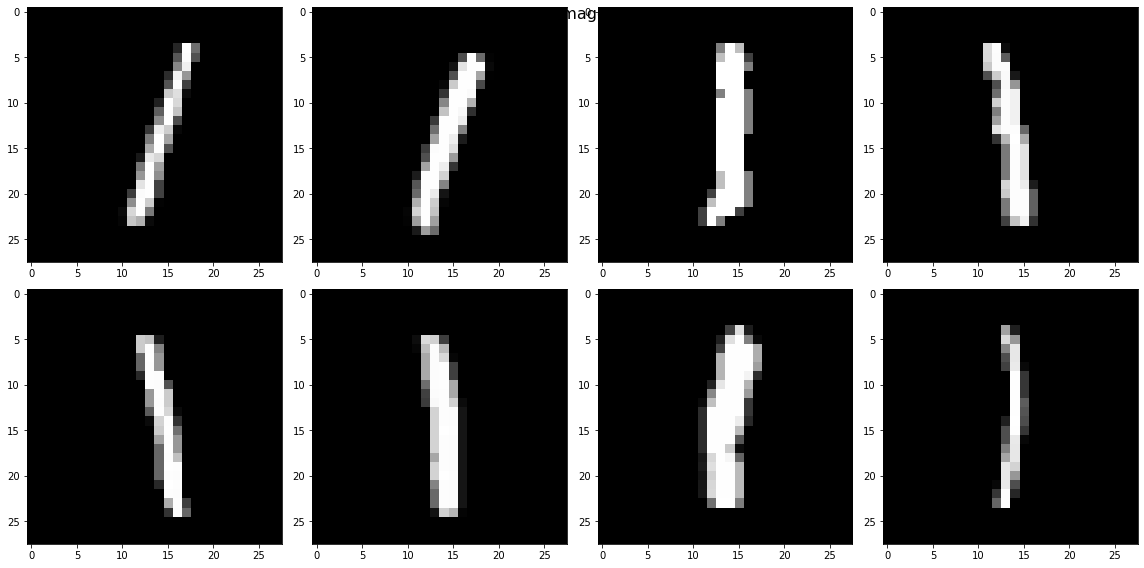

In [510]:
plot_image('testing image for 1', x_test[900:])

## reshape input data

- vectorize input image matrices into vectors (row-major order)

In [511]:
vec_x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
vec_x_test  = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

In [512]:
print('size of training input :', vec_x_train.shape)
print('size of training output :', y_train.shape)

print('size of testing input :', vec_x_test.shape)
print('size of testing output :', y_test.shape)

size of training input : (10000, 784)
size of training output : (10000,)
size of testing input : (1800, 784)
size of testing output : (1800,)


In [513]:
x_train = vec_x_train.transpose()
x_test  = vec_x_test.transpose()

length_data         = x_train.shape[0]
number_data_train   = x_train.shape[1]
number_data_test    = x_test.shape[1]

y_train.reshape(1, number_data_train)
y_test.reshape(1, number_data_test)

array([[0., 0., 0., ..., 1., 1., 1.]])

In [514]:
print('size of training input :', x_train.shape)
print('size of training output :', y_train.shape)

print('size of testing input :', x_test.shape)
print('size of testing output :', y_test.shape)

print('number of training data :', number_data_train)
print('number of testing data :', number_data_test)

size of training input : (784, 10000)
size of training output : (10000,)
size of testing input : (784, 1800)
size of testing output : (1800,)
number of training data : 10000
number of testing data : 1800


## reshape the ground truth

In [515]:
index_train_0 = np.where(y_train == 0)[0]
index_train_1 = np.where(y_train == 1)[0]

index_test_0 = np.where(y_test == 0)[0]
index_test_1 = np.where(y_test == 1)[0]

In [516]:
print('size of ground truth for 0 in the training :', index_train_0.shape)
print('size of ground truth for 1 in the training :', index_train_1.shape)

print('size of ground truth for 0 in the testing :', index_test_0.shape)
print('size of ground truth for 1 in the testing :', index_test_1.shape)

size of ground truth for 0 in the training : (5000,)
size of ground truth for 1 in the training : (5000,)
size of ground truth for 0 in the testing : (900,)
size of ground truth for 1 in the testing : (900,)


In [517]:
print("y_train[:5000]: ",y_train[:5000])
print("y_train[5000:]: ",y_train[5000:])

y_train[:5000]:  [0. 0. 0. ... 0. 0. 0.]
y_train[5000:]:  [1. 1. 1. ... 1. 1. 1.]


## initialize the neural network

- neural network consists of fullly connected linear layer followed by sigmoid activation function
- the size of the fully connected layer is input 784 and output 1

## initialize the weights for the fully connected layer

- create one matrix for the weights

In [518]:
size_input  = length_data 
size_output = 1

weight = np.ones((size_output, size_input))

In [519]:
print('size of the weight :', weight.shape)

size of the weight : (1, 784)


## define neural network 

### define sigmoid function 

In [520]:
def activation_sigmoid(input):

# ================================================== 
# fill up the blank
#
    output = 1/(1+np.exp(-input))
#
# ================================================== 
    return output 

In [521]:
def derivative_sigmoid(input):

# ================================================== 
# fill up the blank
#
    sig=activation_sigmoid(input)
    output = sig*(1-sig)
#
# ================================================== 
    return output

### define the layer

- $n$ : the number of data
- input : $784 \times n$
- output : $1 \times n$

In [522]:
def layer_fully_connected(input, weight):

# ================================================== 
# fill up the blank
#
    output = np.dot(weight, input)
    print("[layer_fully_connected]")
    print("input.shape: ", input.shape)
    print("output.shape: ", output.shape)
#
# ================================================== 
    return output

## define forward propagation

In [523]:
def compute_prediction(input, weight):

# ================================================== 
# fill up the blank
#

    output=layer_fully_connected(input, weight)
    prediction  = activation_sigmoid(output)
#
# ==================================================     
    return prediction 

## define the loss function

- cross entropy between the ground truth and the prediction
- cross entropy : $-y \log(h) - (1-y) \log(1-h)$
  - $y$ : grount truth
  - $h$ : prediction
- output dimension : $1 \times 1$

In [524]:
def compute_loss(prediction, label):

# ================================================== 
# fill up the blank
#
    loss = -label*np.log(prediction) -(1-label)*np.log(1-prediction)
#
# ==================================================
    return loss

## compute the accuracy

- note that iterations over the input data are not allowed inside the function

In [525]:
def compute_accuracy(prediction, label):

# ================================================== 
# fill up the blank
#    



    accuracy = -1
#
# ==================================================
    return accuracy

## compute the gradient with respect to the weights

- note that iterations over the input data are not allowed inside the function
- size of input : $m \times n$
- size of label : $1 \times n$
- size of prediction : $1 \times n$
- $n$ denotes the number of data
- $m$ denotes the length of each data

In [526]:
def compute_gradient_weight(input, label, prediction):

# ================================================== 
# fill up the blank
#    
    residual = prediction -label
    #print("residual.shape: ", residual.shape)
    #print("residual: ", residual)
    #residual_T= residual.transpose()
    #print("residual_T.shape: ", residual_T.shape)
    #gradient = input@residual_T
    input_T=input.transpose()
    gradient = residual@input_T
    print("gradient.shape: ", gradient.shape)
#
# ==================================================
    return gradient

## gradient descent algorithm

- hyper-parameters

In [527]:
number_iteration    = 500
learning_rate       = 0.01
weight              = weight * 0.01

## variables for storing intermediate results

In [528]:
accuracy_train  = np.zeros(number_iteration)
accuracy_test   = np.zeros(number_iteration)

loss_train_mean = np.zeros(number_iteration)
loss_train_std  = np.zeros(number_iteration)
loss_test_mean  = np.zeros(number_iteration)
loss_test_std   = np.zeros(number_iteration)

prediction_train_0_mean = np.zeros(number_iteration)
prediction_train_0_std  = np.zeros(number_iteration)
prediction_train_1_mean = np.zeros(number_iteration)
prediction_train_1_std  = np.zeros(number_iteration)
prediction_test_0_mean  = np.zeros(number_iteration)
prediction_test_0_std   = np.zeros(number_iteration)
prediction_test_1_mean  = np.zeros(number_iteration)
prediction_test_1_std   = np.zeros(number_iteration)

## run the gradient descent algorithm

In [529]:
"""
x_train_0=x_train[:,0:5000]
x_train_1=x_train[:,5000:]

x_test_0=x_test[:,0:900]
x_test_1=x_test[:,900:]

y_train_0=y_train[:5000]
y_train_1=y_train[5000:]

print("x_train_0.shape: ", x_train_0.shape)
print("weight.shape: ", weight.shape)

pred_train_0  = compute_prediction(x_train_0, weight) 

print("y_train_0.shape: ", y_train_0.shape)

loss_train_0 = compute_loss(pred_train_0, y_train_0)
print("pred_train_0.shape: ", pred_train_0.shape)
#print("pred_train_0: ", pred_train_0)
#print("loss_train_0.shape: ", loss_train_0.shape)


grad_train_0 = compute_gradient_weight(x_train_0, y_train_0, pred_train_0)
#1
print("====================")
pred_train_1  = compute_prediction(x_train_1, weight) 

#print("y_train_1.shape: ", y_train_1.shape)

loss_train_1 = compute_loss(pred_train_1, y_train_1)
#print("pred_train_1.shape: ", pred_train_1.shape)
#print("pred_train_1: ", pred_train_1)
#print("loss_train_1.shape: ", loss_train_1.shape)

grad_train_1 = compute_gradient_weight(x_train_1, y_train_1, pred_train_1)


grad_train = (grad_train_0 + grad_train_1)/2
weight  = weight - learning_rate * grad_train


loss_train = (loss_train_0 + loss_train_0)/2

print("grad_train.shape: ", grad_train.shape)
print("loss_train.shape: ", loss_train.shape)
"""

'\nx_train_0=x_train[:,0:5000]\nx_train_1=x_train[:,5000:]\n\nx_test_0=x_test[:,0:900]\nx_test_1=x_test[:,900:]\n\ny_train_0=y_train[:5000]\ny_train_1=y_train[5000:]\n\nprint("x_train_0.shape: ", x_train_0.shape)\nprint("weight.shape: ", weight.shape)\n\npred_train_0  = compute_prediction(x_train_0, weight) \n\nprint("y_train_0.shape: ", y_train_0.shape)\n\nloss_train_0 = compute_loss(pred_train_0, y_train_0)\nprint("pred_train_0.shape: ", pred_train_0.shape)\n#print("pred_train_0: ", pred_train_0)\n#print("loss_train_0.shape: ", loss_train_0.shape)\n\n\ngrad_train_0 = compute_gradient_weight(x_train_0, y_train_0, pred_train_0)\n#1\nprint("====================")\npred_train_1  = compute_prediction(x_train_1, weight) \n\n#print("y_train_1.shape: ", y_train_1.shape)\n\nloss_train_1 = compute_loss(pred_train_1, y_train_1)\n#print("pred_train_1.shape: ", pred_train_1.shape)\n#print("pred_train_1: ", pred_train_1)\n#print("loss_train_1.shape: ", loss_train_1.shape)\n\ngrad_train_1 = compute

In [530]:

for i in tqdm(range(number_iteration)):

# ================================================== 
# fill up the blank
#    
    x_train_0=x_train[:,0:5000]
    x_train_1=x_train[:,5000:]

    x_test_0=x_test[:,0:900]
    x_test_1=x_test[:,900:]

    y_train_0=y_train[:5000]
    y_train_1=y_train[5000:]


    pred_train_0  = compute_prediction(x_train_0, weight) 
    loss_train_0 = compute_loss(pred_train_0, y_train_0)
    grad_train_0 = compute_gradient_weight(x_train_0, y_train_0, pred_train_0)
   
    pred_train_1  = compute_prediction(x_train_1, weight) 
    loss_train_1 = compute_loss(pred_train_1, y_train_1)
    grad_train_1 = compute_gradient_weight(x_train_1, y_train_1, pred_train_1)

    loss_train = (loss_train_0 + loss_train_0)/2
    grad_train = (grad_train_0 + grad_train_1)/2
    weight  = weight - learning_rate * grad_train


#
# ==================================================
  
    #accuracy_train[i]   = 
    #accuracy_test[i]    = 
    
    loss_train_mean[i]  = np.mean(loss_train)
    loss_train_std[i]   = np.std(loss_train)
    #loss_test_mean[i]   = 
    #loss_test_std[i]    = 

    prediction_train_0_mean[i]  = np.mean(pred_train_0)
    prediction_train_0_std[i]   = np.std(pred_train_0)
    prediction_train_1_mean[i]  = np.mean(pred_train_1)
    prediction_train_1_std[i]   = np.std(pred_train_1)
    #prediction_test_0_mean[i]   = 
    #prediction_test_0_std[i]    = 
    #prediction_test_1_mean[i]   = 
    #prediction_test_1_std[i]    = 


  0%|          | 0/500 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
  1%|          | 3/500 [00:00<00:24, 20.20it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  

  2%|▏         | 9/500 [00:00<00:21, 22.65it/s]

(1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]

  2%|▏         | 12/500 [00:00<00:21, 22.69it/s]


input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


  4%|▎         | 18/500 [00:00<00:21, 22.91it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  

  4%|▍         | 21/500 [00:00<00:21, 22.63it/s]

(784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  

  5%|▌         | 27/500 [00:01<00:21, 21.84it/s]

(1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


  6%|▌         | 30/500 [00:01<00:21, 22.20it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


  7%|▋         | 36/500 [00:01<00:20, 22.10it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


  8%|▊         | 39/500 [00:01<00:20, 22.54it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


  9%|▉         | 45/500 [00:02<00:20, 22.35it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 10%|▉         | 48/500 [00:02<00:20, 21.75it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape: 

 11%|█         | 54/500 [00:02<00:19, 22.37it/s]

 (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 11%|█▏        | 57/500 [00:02<00:19, 22.38it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  

 13%|█▎        | 63/500 [00:02<00:19, 22.98it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  

 14%|█▍        | 69/500 [00:03<00:18, 23.12it/s]

(784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 14%|█▍        | 72/500 [00:03<00:19, 22.35it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 16%|█▌        | 78/500 [00:03<00:19, 21.94it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]


 16%|█▌        | 81/500 [00:03<00:19, 20.98it/s]

input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  

 17%|█▋        | 84/500 [00:03<00:20, 20.56it/s]

(1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 18%|█▊        | 90/500 [00:04<00:18, 21.73it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 19%|█▊        | 93/500 [00:04<00:19, 21.25it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 20%|█▉        | 99/500 [00:04<00:18, 21.71it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 21%|██        | 105/500 [00:04<00:17, 22.15it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 22%|██▏       | 108/500 [00:04<00:17, 22.47it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape: 

 23%|██▎       | 114/500 [00:05<00:16, 22.73it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 23%|██▎       | 117/500 [00:05<00:17, 22.12it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 25%|██▍       | 123/500 [00:05<00:17, 21.72it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 25%|██▌       | 126/500 [00:05<00:17, 21.37it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 26%|██▋       | 132/500 [00:05<00:16, 22.92it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape: 

 27%|██▋       | 135/500 [00:06<00:15, 22.93it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 28%|██▊       | 141/500 [00:06<00:16, 22.17it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 29%|██▉       | 144/500 [00:06<00:16, 22.04it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape: 

 30%|███       | 150/500 [00:06<00:15, 22.70it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape: 

 31%|███       | 156/500 [00:07<00:15, 22.92it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 32%|███▏      | 159/500 [00:07<00:15, 22.33it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 33%|███▎      | 165/500 [00:07<00:15, 22.22it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 34%|███▎      | 168/500 [00:07<00:15, 22.05it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 35%|███▍      | 174/500 [00:07<00:14, 22.47it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 35%|███▌      | 177/500 [00:07<00:14, 22.15it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 37%|███▋      | 183/500 [00:08<00:14, 21.99it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)


 38%|███▊      | 189/500 [00:08<00:14, 22.00it/s]

output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 38%|███▊      | 192/500 [00:08<00:13, 22.24it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 40%|███▉      | 198/500 [00:08<00:13, 22.34it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 40%|████      | 201/500 [00:09<00:13, 22.44it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape: 

 41%|████▏     | 207/500 [00:09<00:13, 22.29it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 42%|████▏     | 210/500 [00:09<00:13, 21.93it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 43%|████▎     | 216/500 [00:09<00:13, 21.84it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 44%|████▍     | 219/500 [00:09<00:12, 21.73it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 45%|████▌     | 225/500 [00:10<00:12, 22.63it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 46%|████▌     | 231/500 [00:10<00:12, 22.21it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 47%|████▋     | 234/500 [00:10<00:12, 21.92it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape: 

 47%|████▋     | 237/500 [00:10<00:12, 21.17it/s]

 (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape: 

 49%|████▊     | 243/500 [00:10<00:11, 22.36it/s]

 (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape: 

 50%|████▉     | 249/500 [00:11<00:11, 22.70it/s]

 (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape: 

 50%|█████     | 252/500 [00:11<00:10, 22.66it/s]

 (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 52%|█████▏    | 258/500 [00:11<00:10, 22.96it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  

 52%|█████▏    | 261/500 [00:11<00:10, 22.77it/s]

(1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 53%|█████▎    | 267/500 [00:12<00:10, 23.10it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 54%|█████▍    | 270/500 [00:12<00:10, 22.32it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 55%|█████▌    | 276/500 [00:12<00:10, 21.17it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 56%|█████▌    | 279/500 [00:12<00:10, 21.22it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 57%|█████▋    | 285/500 [00:12<00:09, 22.21it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 58%|█████▊    | 288/500 [00:13<00:09, 21.62it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 59%|█████▉    | 294/500 [00:13<00:09, 21.67it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 59%|█████▉    | 297/500 [00:13<00:09, 21.87it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 61%|██████    | 303/500 [00:13<00:08, 21.98it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 61%|██████    | 306/500 [00:13<00:08, 22.21it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 62%|██████▏   | 312/500 [00:14<00:08, 21.14it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 63%|██████▎   | 315/500 [00:14<00:08, 21.28it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 64%|██████▍   | 321/500 [00:14<00:08, 22.01it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape: 

 65%|██████▌   | 327/500 [00:14<00:07, 22.36it/s]

 (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 66%|██████▌   | 330/500 [00:14<00:07, 22.57it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape: 

 67%|██████▋   | 336/500 [00:15<00:07, 22.94it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 68%|██████▊   | 339/500 [00:15<00:07, 22.40it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 69%|██████▉   | 345/500 [00:15<00:07, 21.66it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 70%|██████▉   | 348/500 [00:15<00:06, 21.77it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 71%|███████   | 354/500 [00:16<00:06, 21.88it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 71%|███████▏  | 357/500 [00:16<00:06, 22.14it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  

 73%|███████▎  | 363/500 [00:16<00:06, 22.65it/s]

(1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 73%|███████▎  | 366/500 [00:16<00:05, 22.42it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 74%|███████▍  | 372/500 [00:16<00:05, 22.41it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape: 

 76%|███████▌  | 378/500 [00:17<00:05, 22.86it/s]

 (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 76%|███████▌  | 381/500 [00:17<00:05, 22.11it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 77%|███████▋  | 387/500 [00:17<00:05, 22.03it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)

 78%|███████▊  | 390/500 [00:17<00:05, 21.36it/s]


gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 79%|███████▉  | 396/500 [00:17<00:04, 22.70it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 80%|███████▉  | 399/500 [00:18<00:04, 22.46it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape: 

 81%|████████  | 405/500 [00:18<00:04, 22.69it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape: 

 82%|████████▏ | 411/500 [00:18<00:03, 22.26it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 83%|████████▎ | 414/500 [00:18<00:03, 22.16it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape: 

 84%|████████▍ | 420/500 [00:18<00:03, 23.02it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 85%|████████▍ | 423/500 [00:19<00:03, 22.58it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 86%|████████▌ | 429/500 [00:19<00:03, 22.40it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 87%|████████▋ | 435/500 [00:19<00:02, 22.66it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 88%|████████▊ | 438/500 [00:19<00:02, 21.53it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 89%|████████▉ | 444/500 [00:20<00:02, 22.24it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 89%|████████▉ | 447/500 [00:20<00:02, 22.33it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 91%|█████████ | 453/500 [00:20<00:02, 22.07it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 91%|█████████ | 456/500 [00:20<00:01, 22.13it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 92%|█████████▏| 462/500 [00:20<00:01, 22.18it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 93%|█████████▎| 465/500 [00:21<00:01, 22.17it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]


 94%|█████████▍| 471/500 [00:21<00:01, 22.20it/s]

input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]

 95%|█████████▍| 474/500 [00:21<00:01, 22.10it/s]


input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)

 96%|█████████▌| 480/500 [00:21<00:00, 22.34it/s]


gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


 97%|█████████▋| 483/500 [00:21<00:00, 21.60it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape: 

 98%|█████████▊| 489/500 [00:22<00:00, 21.82it/s]

 (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)


 98%|█████████▊| 492/500 [00:22<00:00, 22.01it/s]

gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


100%|█████████▉| 498/500 [00:22<00:00, 22.14it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


100%|██████████| 500/500 [00:22<00:00, 22.11it/s]

[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)
[layer_fully_connected]
input.shape:  (784, 5000)
output.shape:  (1, 5000)
gradient.shape:  (1, 784)


---

## functions for presenting the results

---

In [531]:
def function_result_01():

    title           = 'loss (training)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'loss'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(loss_train_mean)), loss_train_mean, '-', color = color_mean)
    plt.fill_between(range(len(loss_train_mean)), loss_train_mean - loss_train_std, loss_train_mean + loss_train_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [532]:
def function_result_02():

    title           = 'loss (testing)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'loss'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(loss_test_mean)), loss_test_mean, '-', color = color_mean)
    plt.fill_between(range(len(loss_test_mean)), loss_test_mean - loss_test_std, loss_test_mean + loss_test_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [533]:
def function_result_03():

    title           = 'prediction for 0 (training)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'prediction'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(prediction_train_0_mean)), prediction_train_0_mean, '-', color = color_mean)
    plt.fill_between(range(len(prediction_train_0_mean)), prediction_train_0_mean - prediction_train_0_std, prediction_train_0_mean + prediction_train_0_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [534]:
def function_result_04():

    title           = 'prediction for 1 (training)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'prediction'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(prediction_train_1_mean)), prediction_train_1_mean, '-', color = color_mean)
    plt.fill_between(range(len(prediction_train_1_mean)), prediction_train_1_mean - prediction_train_1_std, prediction_train_1_mean + prediction_train_1_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [535]:
def function_result_05():

    title           = 'prediction for 0 (testing)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'prediction'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(prediction_test_0_mean)), prediction_test_0_mean, '-', color = color_mean)
    plt.fill_between(range(len(prediction_test_0_mean)), prediction_test_0_mean - prediction_test_0_std, prediction_test_0_mean + prediction_test_0_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [536]:
def function_result_06():

    title           = 'prediction for 1 (testing)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'prediction'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(prediction_test_1_mean)), prediction_test_1_mean, '-', color = color_mean)
    plt.fill_between(range(len(prediction_test_1_mean)), prediction_test_1_mean - prediction_test_1_std, prediction_test_1_mean + prediction_test_1_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [537]:
def function_result_07():

    title           = 'accuracy (training)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'accuracy'

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(accuracy_train)), accuracy_train, '-', color = 'red')
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [538]:
def function_result_08():

    title           = 'accuracy (testing)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'accuracy'

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(accuracy_test)), accuracy_test, '-', color = 'red')
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [539]:
def function_result_09():

    print('final training loss = %6.5f' % (loss_train_mean[-1]))

In [540]:
def function_result_10():

    print('final testing loss = %6.5f' % (loss_test_mean[-1]))

In [541]:
def function_result_11():

    print('final training accuracy = %6.5f' % (accuracy_train[-1]))

In [542]:
def function_result_12():

    print('final testing accuracy = %6.5f' % (accuracy_test[-1]))

---

## results 

---


################################################################################
#
# RESULT # 01
#
################################################################################



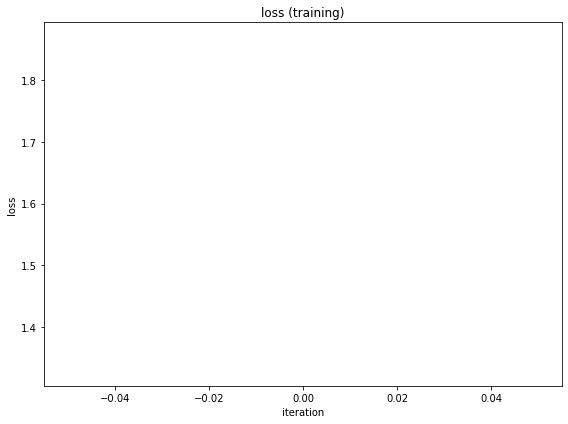


################################################################################
#
# RESULT # 02
#
################################################################################



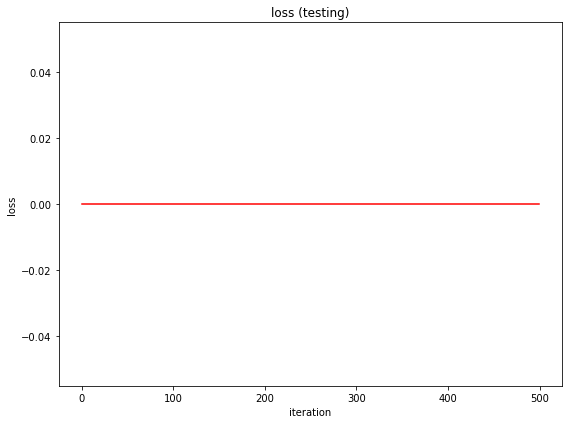


################################################################################
#
# RESULT # 03
#
################################################################################



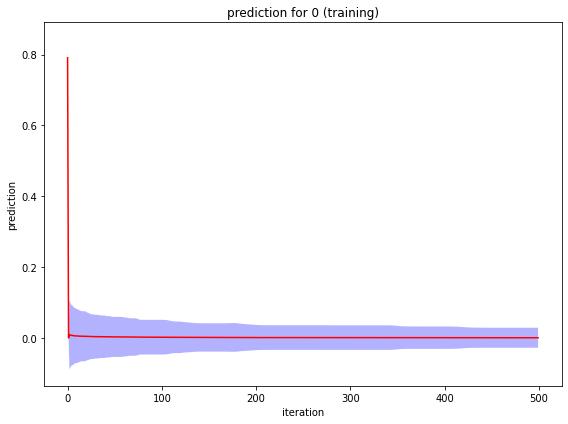


################################################################################
#
# RESULT # 04
#
################################################################################



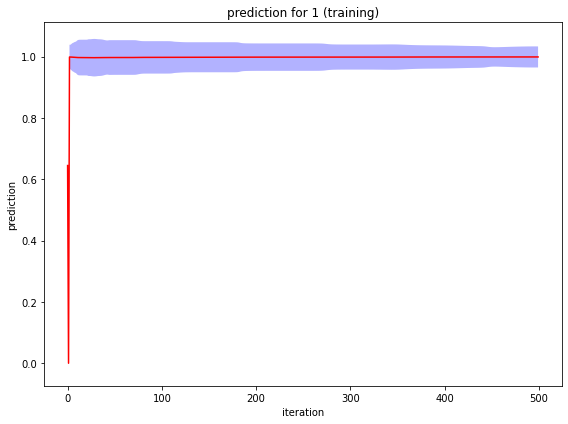


################################################################################
#
# RESULT # 05
#
################################################################################



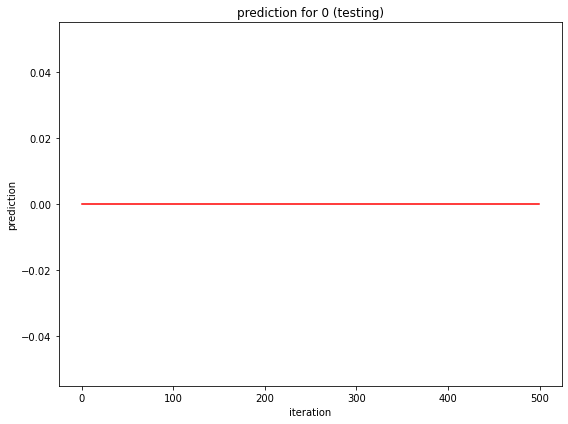


################################################################################
#
# RESULT # 06
#
################################################################################



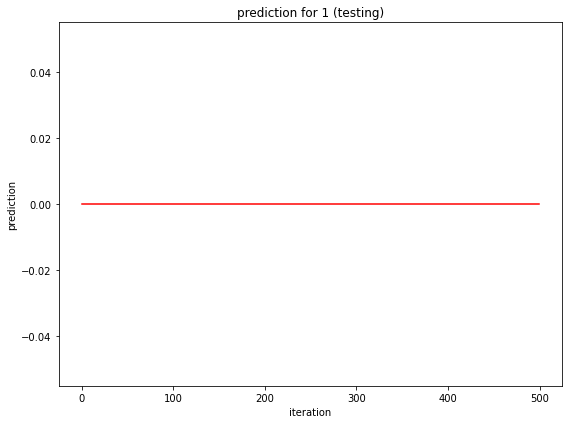


################################################################################
#
# RESULT # 07
#
################################################################################



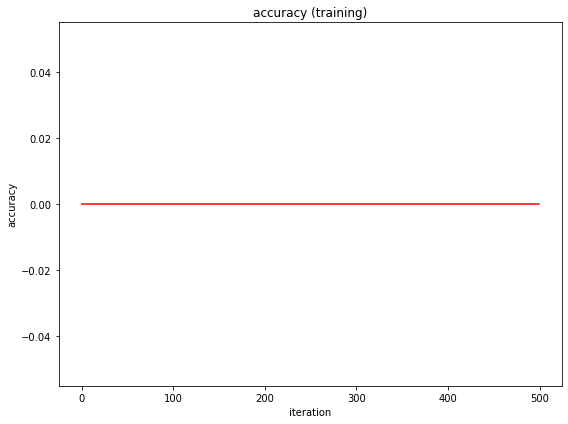


################################################################################
#
# RESULT # 08
#
################################################################################



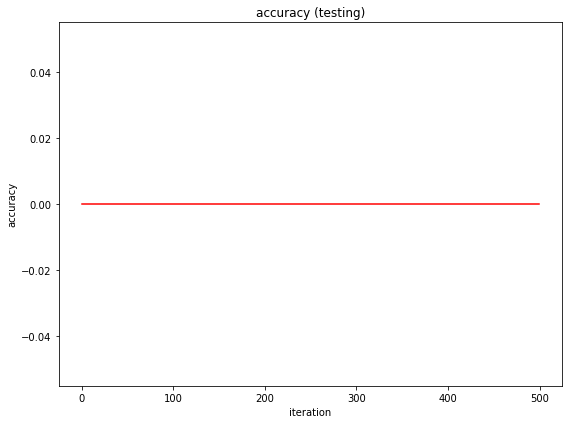


################################################################################
#
# RESULT # 09
#
################################################################################

final training loss =    nan

################################################################################
#
# RESULT # 10
#
################################################################################

final testing loss = 0.00000

################################################################################
#
# RESULT # 11
#
################################################################################

final training accuracy = 0.00000

################################################################################
#
# RESULT # 12
#
################################################################################

final testing accuracy = 0.00000


In [543]:
number_result = 12 

for i in range(number_result):

    title           = '# RESULT # {:02d}'.format(i+1) 
    name_function   = 'function_result_{:02d}()'.format(i+1)

    print('') 
    print('################################################################################')
    print('#') 
    print(title)
    print('#') 
    print('################################################################################')
    print('') 

    eval(name_function)